In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/practice-hackathon/sample_submission.csv
/kaggle/input/practice-hackathon/Train.csv
/kaggle/input/practice-hackathon/Test.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/practice-hackathon/Train.csv")

In [3]:
print(train_df.shape)

(3132, 9)


In [4]:
train_df.head()

,A,B,C,D,E,F,G,H,Target
0,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9
1,F,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12
2,M,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10
3,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6


In [5]:
train_df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Target'], dtype='object')

In [6]:
## Label encoding column A of our dataset
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train_df['A']= label_encoder.fit_transform(train_df['A'])
  
train_df['A'].unique()

array([0, 2, 1])

In [7]:
X = train_df.drop(['Target'], axis=1)
y = train_df['Target']

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1)

In [9]:
print(y_train.value_counts())

9     453
10    420
8     402
11    335
7     246
12    184
6     183
13    147
14     84
15     71
5      68
16     45
17     38
4      37
19     25
18     25
20     20
3      11
21      9
23      5
24      2
22      2
26      1
29      1
27      1
2       1
25      1
1       1
Name: Target, dtype: int64


In [10]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = lr.predict(X_val)

In [12]:
error= mean_squared_error(y_val, y_pred)
print(error)

4.9606453670432415


In [13]:
test_data = pd.read_csv("/kaggle/input/practice-hackathon/Test.csv")

In [14]:
test_data.shape

(1045, 9)

In [15]:
test_data.head()

,Index,A,B,C,D,E,F,G,H
0,866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325
1,1483,M,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245
2,599,F,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335
3,1702,F,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380
4,670,M,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215


In [16]:
test_data['A']= label_encoder.fit_transform(test_data['A'])

In [17]:
Index=test_data['Index']
test_data.drop(['Index'],axis=1,inplace=True)

In [18]:
test_data

,A,B,C,D,E,F,G,H
0,2,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325
1,2,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245
2,0,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335
3,0,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380
4,2,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215
...,...,...,...,...,...,...,...,...
1040,1,0.470,0.370,0.120,0.4705,0.1845,0.1055,0.155
1041,2,0.580,0.460,0.150,1.0165,0.4910,0.2210,0.265
1042,2,0.635,0.510,0.185,1.3080,0.5440,0.3180,0.377
1043,2,0.460,0.375,0.140,0.5105,0.1920,0.1045,0.205


In [19]:
y_test = lr.predict(test_data)

In [20]:
result = pd.DataFrame(Index, columns = ['Index'])
result['Target']= y_test


In [21]:
result

,Index,Target
0,866,11.743354
1,1483,10.088435
2,599,13.934069
3,1702,11.929282
4,670,10.915419
...,...,...
1040,532,9.561130
1041,3417,9.609139
1042,1505,12.319918
1043,2245,10.625307


In [22]:
result.to_csv("submission1.csv", index=False) #(for making submission file)

RidgeRegressionApproach

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [24]:
ridge_regressor=Ridge()

In [25]:
parameters={'alpha':[10**(-1),10**(-2),10**(-3),1,10,0.5,0.51,0.75,0.52,0.515,]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.01, 0.001, 1, 10, 0.5, 0.51, 0.75,
                                   0.52, 0.515]},
             scoring='neg_mean_squared_error')

In [26]:
print(ridgecv.best_params_)

{'alpha': 0.75}


In [27]:
print(ridgecv.best_score_)

-5.034176634574688


In [28]:
ridge_pred=ridgecv.predict(X_val)

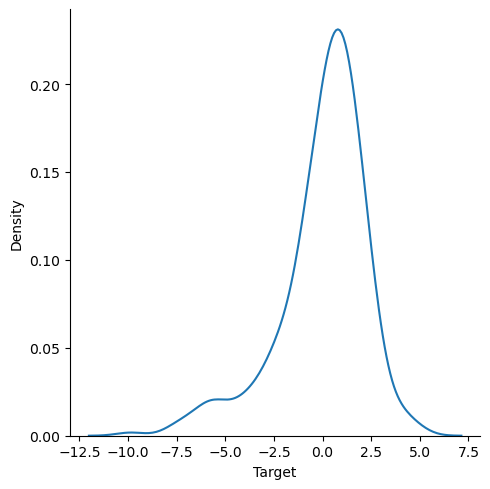

In [29]:
import seaborn as sns
sns.displot(ridge_pred-y_val,kind='kde')

In [30]:
from sklearn.metrics import r2_score

In [31]:
score= r2_score(ridge_pred,y_val)
score

0.010047041790115507

In [32]:
ridge_pred_test=ridgecv.predict(test_data)

In [33]:
result_rr = pd.DataFrame(Index, columns = ['Index'])
result_rr['Target']=ridge_pred_test
result_rr

,Index,Target
0,866,11.870779
1,1483,10.221579
2,599,13.611620
3,1702,11.963701
4,670,10.656566
...,...,...
1040,532,9.488405
1041,3417,9.646983
1042,1505,12.271473
1043,2245,10.446466


SVRM

In [34]:
#Support Vector Regression Implementation
from sklearn.svm import SVR
C_vals = [0.1,1,10,100,1000]                   #providing values for hypertuning
eps_vals = [1,0.1,0.01,0.001,0.0001,0.00001]

from scipy import stats
parameters = []
parameter_cols =  ['c','epsilon','correlation']
for C in C_vals:
    for epsilon in eps_vals:
        model = SVR(kernel='rbf', C=C, epsilon=epsilon)
        svr = model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        c = stats.pearsonr(y_val,y_pred)[0]
        parameters.append([C,epsilon,c])

#printing parameters in decending order
parameter_df = pd.DataFrame(parameters,columns= parameter_cols)
parameter_df = parameter_df.sort_values(by=['correlation'], ascending=False)
parameter_df.head(3)

,c,epsilon,correlation
24,1000.0,1.0,0.757490
25,1000.0,0.1,0.754750
18,100.0,1.0,0.753339


In [35]:
from sklearn.svm import SVR

model_svr = SVR(kernel='rbf', C=parameter_df.iloc[0,0], epsilon=parameter_df.iloc[0,1])   #Training data on the most appropriate paramenters
svr = model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_val)

#Finding MSE of prediction with training target
err = mean_squared_error(y_pred_svr, y_val)
err

4.66401929011203

In [36]:
svr_pred_test=model_svr.predict(test_data)

In [37]:
result_svr = pd.DataFrame(Index, columns = ['Index'])
result_svr['Target']= svr_pred_test
result_svr

,Index,Target
0,866,12.031369
1,1483,9.481473
2,599,14.793463
3,1702,11.265735
4,670,11.440022
...,...,...
1040,532,8.812741
1041,3417,9.200184
1042,1505,11.772766
1043,2245,11.469851
